In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

#from smartbase import smartbase

In [28]:
def DateToPalEncoder(InsertDate):
    if InsertDate not in ['w','g','r','b']:
        if InsertDate < datetime(2019, 1, 1):
            return str('b')
        elif InsertDate < datetime(2020, 1, 1):
            return str('g')
        else:
            return str('r')
    else:
        return InsertDate

# datetime.datetime(2020, 5, 17)    
def df_encode_color(df):
    df['Палитра'] = df.apply(lambda row: DateToPalEncoder(row['Дата']), axis=1)
    return df

In [29]:
DUMPS_DIR = r"D:\data\data\Smartbase"
#sb = smartbase.SmartBase(login="-22080", host="http://smartbase", caption_mode="pandas")

#df0 = pd.read_excel('C:\Course\ПНППК\Table 184.xlsx', header=[0,1,2,3])
#df0 = pd.read_excel('D:\Зубарев (D)\Git\Smartbase\Table 184.xlsx', header=[0,1,2])
#df0 = pd.read_csv('D:\Зубарев (D)\Git\Smartbase\Results_table_184.csv', header=[0])
#df0_sql = pd.read_csv('D:\Зубарев (D)\Git\Smartbase\Results_table_184_all.csv', header=[0])

#ech = sb.get_table(184)
#df_e = ech.df
#df_e.info()

In [54]:
df_e = pd.read_excel(r'C:\Git repositories\Smartbase\Table 184.xlsx', header=[0,1,2])
df_e0 = df_e.copy()
df_e.head()

Статус № Проверки в диапазоне рабочих температур  \
               Статус № Проверки в диапазоне рабочих температур   
               Статус № Проверки в диапазоне рабочих температур   
0  Термоцикл завершен                                     32876   
1  Термоцикл завершен                                     32875   
2  Термоцикл завершен                                     32874   
3  Термоцикл завершен                                     32873   
4  Термоцикл завершен                                     32872   

  Тип термоцикла                                      № ЭЧ   № пульта  \
  Тип термоцикла                                      № ЭЧ   № пульта   
  Тип термоцикла                                      № ЭЧ   № пульта   
0        ТЦ 81ч.  12060/120_каркас-6272/CT-93-22-3-132-1/2   Пульт №6   
1        ТЦ 81ч.  11902/120_каркас-6379/CT-97-19-2-104-1/2  Пульт №20   
2        ТЦ 81ч.  11925/120_каркас-6345/CT-85-19-4-172-2/3  Пульт №27   
3        ТЦ 81ч.  12479/120_каркас-6603/CT-101-15-1-52-1/3   Пульт №9   
4        ТЦ 81ч.  10680/120_каркас-5892/CT-88-07-2-121-3/2  Пульт №26   

  Дата испытания Комментарии Теги Термоцикл на -50 °С              ...  \
  Дата испытания Комментарии Теги         Исполнитель № испытания  ...   
  Дата испытания Комментарии Теги         Исполнитель № испытания  ...   
0     2020-11-29         NaN  NaN                 NaN         3.0  ...   
1     2020-11-29         NaN  NaN                 NaN         3.0  ...   
2     2020-11-29         NaN  NaN                 NaN         3.0  ...   
3     2020-10-28         NaN  NaN                 NaN         1.0  ...   
4     2020-10-28         NaN  NaN                 NaN         2.0  ...   

  Паразитный интерферометр на +60°С             \
                              Вывод Примечание   
                              Вывод Примечание   
0                               NaN        NaN   
1                               NaN        NaN   
2                               NaN        NaN   
3                               NaN        NaN   
4                               NaN        NaN   

  Паразитный интерферометр на -50°С (-30°С)                   РМ№  \
                                Исполнитель Вывод Примечание  РМ№   
                                Исполнитель Вывод Примечание  РМ№   
0                                       NaN   NaN        NaN  NaN   
1                                       NaN   NaN        NaN  NaN   
2                                       NaN   NaN        NaN  NaN   
3                                       NaN   NaN        NaN  NaN   
4                                       NaN   NaN        NaN  NaN   

             Системные столбцы                          \
                     Создатель            Дата вставки   
                     Создатель            Дата вставки   
0  Попов Владимир Владимирович 2020-11-01 17:24:42.327   
1  Попов Владимир Владимирович 2020-11-01 17:20:34.873   
2  Попов Владимир Владимирович 2020-11-01 17:16:47.210   
3   Михайленко Андрей Олегович 2020-11-01 09:58:50.417   
4   Михайленко Андрей Олегович 2020-11-01 09:58:00.500   

                                                        
                      Редактор          Дата изменения  
                      Редактор          Дата изменения  
0  Попов Владимир Владимирович 2020-11-01 17:24:42.983  
1  Попов Владимир Владимирович 2020-11-01 17:20:35.513  
2  Попов Владимир Владимирович 2020-11-01 17:16:49.947  
3   Михайленко Андрей Олегович 2020-11-01 09:58:51.040  
4   Михайленко Андрей Олегович 2020-11-01 09:58:01.127  

[5 rows x 70 columns]

In [90]:
df_e = df_e0.copy()
df_e = df_e.drop(columns=[("Комментарии", "Комментарии", "Комментарии")
                         , ("Теги", "Теги", "Теги")
                         ,("Дата испытания", "Дата испытания", "Дата испытания")
                         ,("Термоцикл на -50 °С", "Исполнитель", "Исполнитель")
                         ,("Термоцикл на -50 °С", "№ испытания", "№ испытания") 
                          ,("Термоцикл на -50 °С", "Дефекты прописи ТЦ", "Дефекты прописи ТЦ")  
                          
                          ,("Медленный прогрев", "Файл отчета", "Файл отчета") 
                          ,("Медленный прогрев", "Дефекты прописи МП", "Дефекты прописи МП") 
                          ,("Медленный прогрев", "Анализ формы графика", "Анализ формы графика") 
                          
                         ,("Паразитный интерферометр на +60°С", "Исполнитель", "Исполнитель")
                          ,("Паразитный интерферометр на +60°С", "Примечание", "Примечание")
                         ,("Паразитный интерферометр на -50°С (-30°С)", "Исполнитель", "Исполнитель")
                          ,("Паразитный интерферометр на -50°С (-30°С)", "Примечание", "Примечание")
                         ,("Термоцикл 81 ч.", "Графики", "Графики")
                          
                         ,("Системные столбцы", "Создатель", "Создатель")
                         ,("Системные столбцы", "Дата вставки", "Дата вставки")
                         ,("Системные столбцы", "Редактор", "Редактор")
                         ,("Системные столбцы", "Дата изменения", "Дата изменения") ])
df_e.iloc[:,:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32046 entries, 0 to 32045
Data columns (total 50 columns):
(Статус, Статус, Статус)                                                                                                                                                                     32046 non-null object
(№ Проверки в диапазоне рабочих температур, № Проверки в диапазоне рабочих температур, № Проверки в диапазоне рабочих температур)                                                            32046 non-null int64
(Тип термоцикла, Тип термоцикла, Тип термоцикла)                                                                                                                                             30344 non-null object
(№ ЭЧ, № ЭЧ, № ЭЧ)                                                                                                                                                                           32012 non-null object
(№ пульта, № пульта, № пульта)                  

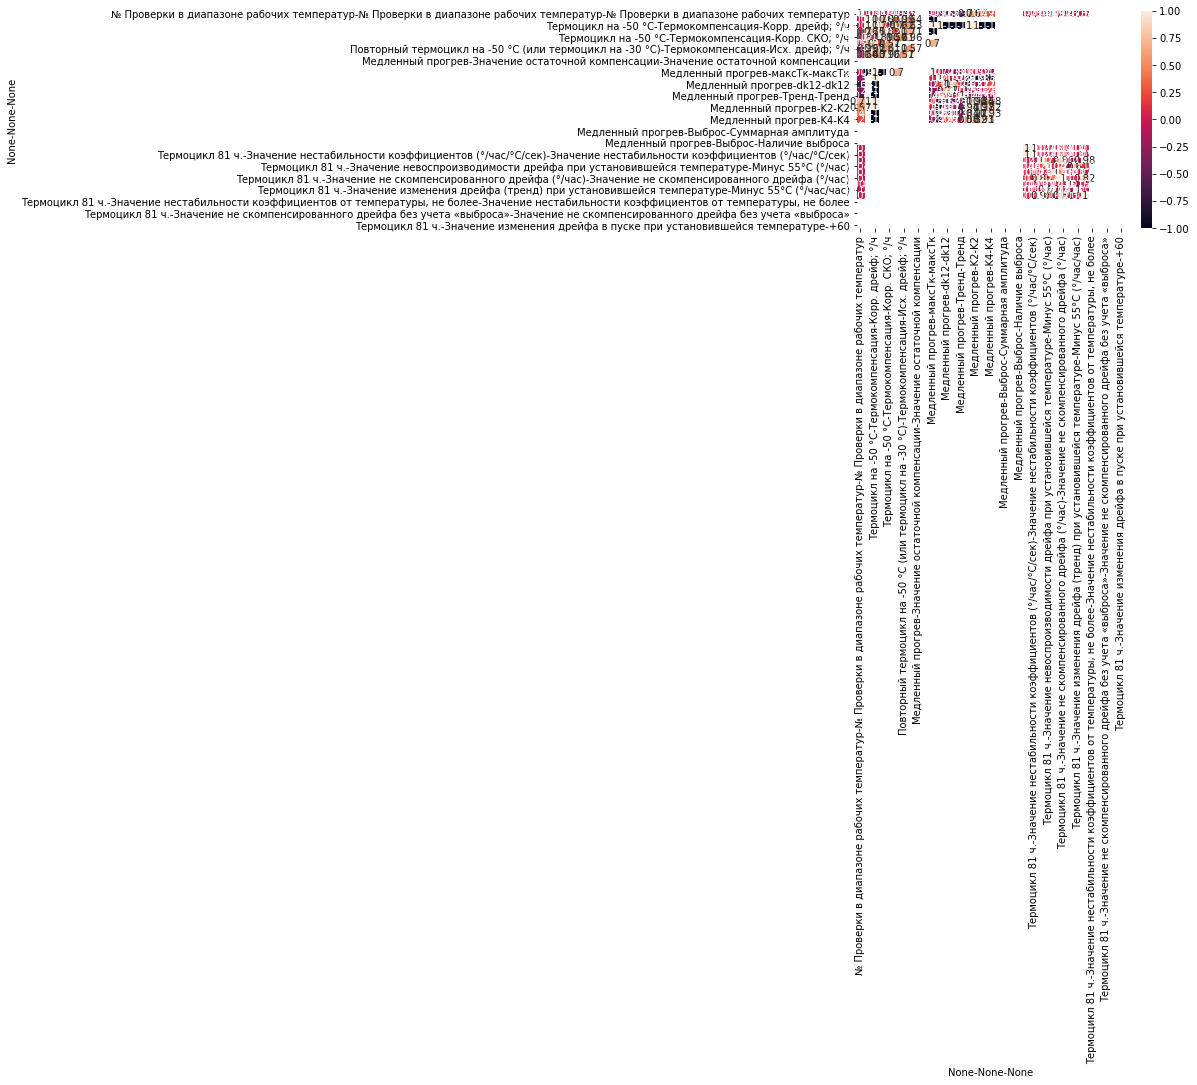

In [91]:
corrMatrix = df_e.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [92]:
corrMatrix

№ Проверки в диапазоне рабочих температур  \
                                                                                                                                                         № Проверки в диапазоне рабочих температур   
                                                                                                                                                         № Проверки в диапазоне рабочих температур   
№ Проверки в диапазоне рабочих температур          № Проверки в диапазоне рабочих температур          № Проверки в диапазоне рабочих температур                                           1.000000   
Термоцикл на -50 °С                                Термокомпенсация                                   Исх. дрейф; °/ч                                                                    -0.003421   
                                                                                                      Корр. дрейф; °/ч                                                                   -0.001908   
                                                                                                      Исх. СКО; °/ч                                                                      -0.020997   
                                                                                                      Корр. СКО; °/ч                                                                     -0.011103   
                                                                                                      Класс точности                                                                      0.092765   
Повторный термоцикл на -50 °С (или термоцикл на... Термокомпенсация                                   Исх. дрейф; °/ч                                                                    -0.449684   
                                                                                                      Корр. дрейф; °/ч                                                                   -0.055023   
Медленный прогрев                                  Значение остаточной компенсации                    Значение остаточной компенсации                                                          NaN   
                                                   Коэффициенты                                       Коэффициенты                                                                             NaN   
                                                   максТк                                             максТк                                                                             -0.009234   
                                                   максК                                              максК                                                                              -0.307950   
                                                   dk12                                               dk12                                                                               -0.675223   
                                                   dk34                                               dk34                                                                               -0.293142   
                                                   Тренд                                              Тренд                                                                              -0.597055   
                                                   K1                                                 K1                                                                                  0.714884   
                                                   K2                                                 K2                                                                                  0.571686   
                                                   K3                                                 K3                                                                                  0.48753

In [89]:
df_e.iloc[:,:20]

Статус № Проверки в диапазоне рабочих температур  \
                   Статус № Проверки в диапазоне рабочих температур   
                   Статус № Проверки в диапазоне рабочих температур   
0      Термоцикл завершен                                     32876   
1      Термоцикл завершен                                     32875   
2      Термоцикл завершен                                     32874   
3      Термоцикл завершен                                     32873   
4      Термоцикл завершен                                     32872   
5      Термоцикл завершен                                     32871   
6      Термоцикл завершен                                     32870   
7      Термоцикл завершен                                     32869   
8      Термоцикл завершен                                     32868   
9      Термоцикл завершен                                     32867   
10     Термоцикл завершен                                     32866   
11     Термоцикл завершен                                     32865   
12     Термоцикл завершен                                     32864   
13     Термоцикл завершен                                     32854   
14     Термоцикл завершен                                     32853   
15     Термоцикл завершен                                     32863   
16     Термоцикл завершен                                     32862   
17     Термоцикл завершен                                     32861   
18     Термоцикл завершен                                     32860   
19     Термоцикл завершен                                     32859   
20     Термоцикл завершен                                     32858   
21     Термоцикл завершен                                     32857   
22     Термоцикл завершен                                     32856   
23     Термоцикл завершен                                     32855   
24     Термоцикл завершен                                     32633   
25     Термоцикл завершен                                     32642   
26     Термоцикл завершен                                     32616   
27     Термоцикл завершен                                     32852   
28     Термоцикл завершен                                     32851   
29     Термоцикл завершен                                     32850   
...                   ...                                       ...   
32016               Готов                                      1302   
32017               Готов                                      1308   
32018               Готов                                      1309   
32019               Готов                                      1311   
32020               Готов                                      1313   
32021               Готов                                      1314   
32022               Готов                                      1319   
32023               Готов                                      1320   
32024               Готов                                      1322   
32025               Готов                                      1327   
32026               Готов                                      1356   
32027               Готов                                      1333   
32028               Готов                                      1341   
32029               Готов                                      1342   
32030               Готов                                      1375   
32031               Готов                                      1383   
32032               Готов                                      1386   
32033               Готов                                      1395   
32034               Готов                                      1398   
32035               Готов                                      1402   
32036               Готов                                      1410   
32037               Готов                                      1414   
32038               Готов                  

# Оценить зависимость коэф. чувствительности ВОГ к изменению температуры с параметром  нескомпенсированного дрейфа

## Подготовка данных. Статистика
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [71]:
'''#df1 = df0.iloc[:,[3,5,43,48]].dropna()
df1 = df_e.iloc[:,[3,5,43,48]].dropna()
df1.to_excel('D:\Зубарев (D)\Git\Smartbase\df1.xlsx')
print(df1.info())
df1.columns=['№ЭЧ', 'Дата', 'КЧ', 'Дрейф']

#df1 = df1[df1['КЧ'] < 80]
#df1 = df1[df1['Дрейф'] < 0.5]
df1 = df_encode_color(df1)'''
df1 = pd.read_excel(r'C:\Git repositories\Smartbase\df1.xlsx', skiprows=3) # , header=[0,1,2]
df1.columns=['SysId','№ЭЧ', 'Дата', 'КЧ', 'Дрейф']
df1.head()

,SysId,№ЭЧ,Дата,КЧ,Дрейф
0,57374,5648/120_каркас-4901/CT-78-09-2-93-1/1,2019-05-19,4.061,0.048
1,57393,5499/120_каркас-4893/CT-80-07-4-201-1/1,2019-05-19,11.342,0.027
2,57437,9044/120_каркас-5112 В/CQT-8-14-3-122-1/6,2019-05-14,9.484,0.366
3,57445,4096/120_каркас-4333/CT-75-07-3-154-3/1,2019-05-14,12.369,0.188
4,57447,8213/120_каркас-3854/CT-65-20-4-172-5/3,2019-05-13,5.954,0.034


Критерий колмогорова-смирнова Returns statistic: float 
KS test statistic, either D, D+ or D-.
 pvalue: float
One-tailed or two-tailed p-value.
Коэффициент чувствительности KstestResult(statistic=0.9566614824532703, pvalue=0.0)
Не скомп дрейф KstestResult(statistic=0.506256344070669, pvalue=0.0)

Критерий Шапиро-Уилко statistic: float 
The test statistic. 
p-value: float 
The p-value for the hypothesis test.
Коэффициент чувствительности (0.7973279356956482, 0.0)
Не скомп дрейф (0.5826849937438965, 0.0)



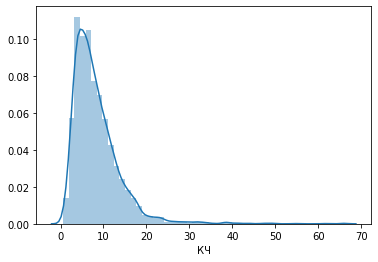

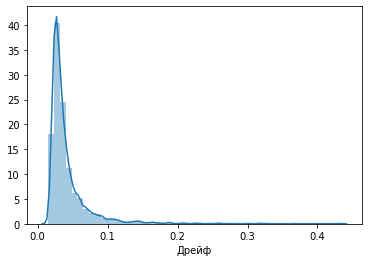

In [37]:
df1_g = df1.copy()
df1_g = df1_g[df1_g['КЧ'] < 80]
df1_g = df1_g[df1_g['Дрейф'] < 0.5]

print("Критерий колмогорова-смирнова", "Returns statistic: float \nKS test statistic, either D, D+ or D-.\n pvalue: float\nOne-tailed or two-tailed p-value.")
print("Коэффициент чувствительности", stats.kstest(df1_g.КЧ, 'norm'))
print("Не скомп дрейф", stats.kstest(df1_g.Дрейф, 'norm'), end='\n\n')

print('Критерий Шапиро-Уилко', "statistic: float \nThe test statistic. \np-value: float \nThe p-value for the hypothesis test.")
print("Коэффициент чувствительности", stats.shapiro(df1_g.КЧ))
print("Не скомп дрейф", stats.shapiro(df1_g.Дрейф), end='\n\n')



sns.distplot(df1_g.КЧ)
plt.show()
sns.distplot(df1_g.Дрейф)

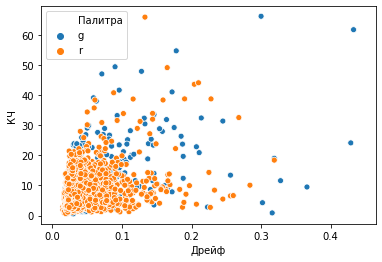

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data=df1_g, x='Дрейф', y='КЧ', hue='Палитра')
try:
    plt.savefig(r'C:\Course\ПНППК\5_1.png')
except FileNotFoundError:    
    plt.savefig(r'D:\Зубарев (D)\Git\Smartbase\5_1.png')
except:
    pass

In [141]:
n_bins = 20
#df1_g['bins'] = pd.cut(df1_g["КЧ"], n_bins)
df1_g['bins'] = pd.cut(df1_g["КЧ"], np.array([0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 20, 70]))
df1_bins = pd.DataFrame()
for i in df1_g.bins.sort_values().unique():
    std = df1_g[df1_g["bins"] == i]["Дрейф"].std()
    cnt = df1_g[df1_g["bins"] == i]["Дрейф"].size
    df1_bins = df1_bins.append({"bins":i, "std":std, 'cnt':cnt}, ignore_index=True)
df1_bins.dropna()   

,bins,cnt,std
0,"(0, 3]",295.0,0.029983
1,"(3, 4]",394.0,0.021787
2,"(4, 5]",432.0,0.024246
3,"(5, 6]",391.0,0.021859
4,"(6, 7]",386.0,0.024981
5,"(7, 8]",318.0,0.025511
6,"(8, 9]",300.0,0.026864
7,"(9, 10]",220.0,0.034796
8,"(10, 11]",218.0,0.029343
9,"(11, 12]",169.0,0.033285


## Корреляция
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [65]:
print('За всё время')
a = df1["КЧ"]
b = df1["Дрейф"]

#a = np.array([1,2,3])
#b = np.array([2,4,6])

print("The Pearson correlation coefficient measures the linear relationship between two datasets")
print( stats.pearsonr(a, b) )

print("The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.")
print(stats.spearmanr(a,b))

print('\nЗа 2020')
a2 = df1[df1["Палитра"] == 'r']["КЧ"]
b2 = df1[df1["Палитра"] == 'r']["Дрейф"]

print("The Pearson correlation coefficient measures the linear relationship between two datasets")
print( stats.pearsonr(a2, b2) )

print("The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.")
print(stats.spearmanr(a2,b2))

За всё время
The Pearson correlation coefficient measures the linear relationship between two datasets
(0.1710848415234059, 1.7318399538665152e-26)
The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.
SpearmanrResult(correlation=0.27673323865836613, pvalue=3.947115199335215e-68)

За 2020
The Pearson correlation coefficient measures the linear relationship between two datasets
(0.27495127992897606, 8.537226394230632e-41)
The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.
SpearmanrResult(correlation=0.25088004426260424, pvalue=4.919572298346752e-34)


## Distance correlation
1. https://www.freecodecamp.org/news/how-machines-make-predictions-finding-correlations-in-complex-data-dfd9f0d87889/
2. https://gist.github.com/satra/aa3d19a12b74e9ab7941
3. https://gist.github.com/wladston/c931b1495184fbb99bec

In [63]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import copy


def distcorr(Xval, Yval, pval=True, nruns=500):
    """ Compute the distance correlation function, returning the p-value.
    Based on Satra/distcorr.py (gist aa3d19a12b74e9ab7941)
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    (0.76267624241686671, 0.266)
    """
    X = np.atleast_1d(Xval)
    Y = np.atleast_1d(Yval)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()

    dcov2_xy = (A * B).sum() / float(n * n)
    dcov2_xx = (A * A).sum() / float(n * n)
    dcov2_yy = (B * B).sum() / float(n * n)
    dcor = np.sqrt(dcov2_xy) / np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))

    if pval:
        greater = 0
        for i in range(nruns):
            Y_r = copy.copy(Yval)
            np.random.shuffle(Y_r)
            if distcorr(Xval, Y_r, pval=False) > dcor:
                greater += 1
        return (dcor, greater / float(nruns))
    else:
        return dcor

In [68]:
a = np.array(a)
b = np.array(b)
disctcorr_df1_1 = distcorr(a,b)
print(disctcorr_df1_1)


a2 = np.array(a2)
b2 = np.array(b2)
disctcorr_df1_2 = distcorr(a2,b2)
print(disctcorr_df1_2)

(0.28501898131974235, 0.0)
(0.22962042996966012, 0.0)


# Оценить влияние нестабильности коэффициентов на параметр нескомпенсированного дрейфа.

## Подготовка данных. Статистика

In [75]:
#df2 = df0.iloc[:,[3,5,44,48]].dropna()
'''df2 = df_e.iloc[:,[3,5,44,48]].dropna()
df2.to_excel('D:\Зубарев (D)\Git\Smartbase\df2.xlsx')
print(df2.info())
df2.columns=['№ЭЧ', 'Дата', 'Нестабильность', 'Дрейф']
df2 = df2[df2['Дрейф'] < 0.5]
df2 = df_encode_color(df2)'''
df2 = pd.read_excel(r'C:\Git repositories\Smartbase\df2.xlsx', skiprows=3)
df2.columns=['SysId','№ЭЧ', 'Дата', 'Нестабильность', 'Дрейф']
df2.head()

,SysId,№ЭЧ,Дата,Нестабильность,Дрейф
0,57374,5648/120_каркас-4901/CT-78-09-2-93-1/1,2019-05-19,0.328,0.048
1,57393,5499/120_каркас-4893/CT-80-07-4-201-1/1,2019-05-19,0.590,0.027
2,57437,9044/120_каркас-5112 В/CQT-8-14-3-122-1/6,2019-05-14,3.062,0.366
3,57445,4096/120_каркас-4333/CT-75-07-3-154-3/1,2019-05-14,1.271,0.188
4,57447,8213/120_каркас-3854/CT-65-20-4-172-5/3,2019-05-13,0.680,0.034


Критерий колмогорова-смирнова Returns statistic: float 
KS test statistic, either D, D+ or D-.
 pvalue: float
One-tailed or two-tailed p-value.
Нестабильность KstestResult(statistic=0.6451318344051007, pvalue=0.0)
Не скомп дрейф KstestResult(statistic=0.5062570331420791, pvalue=0.0)

Критерий Шапиро-Уилко statistic: float 
The test statistic. 
p-value: float 
The p-value for the hypothesis test.
Нестабильность (0.3000956177711487, 0.0)
Не скомп дрейф (0.539688229560852, 0.0)



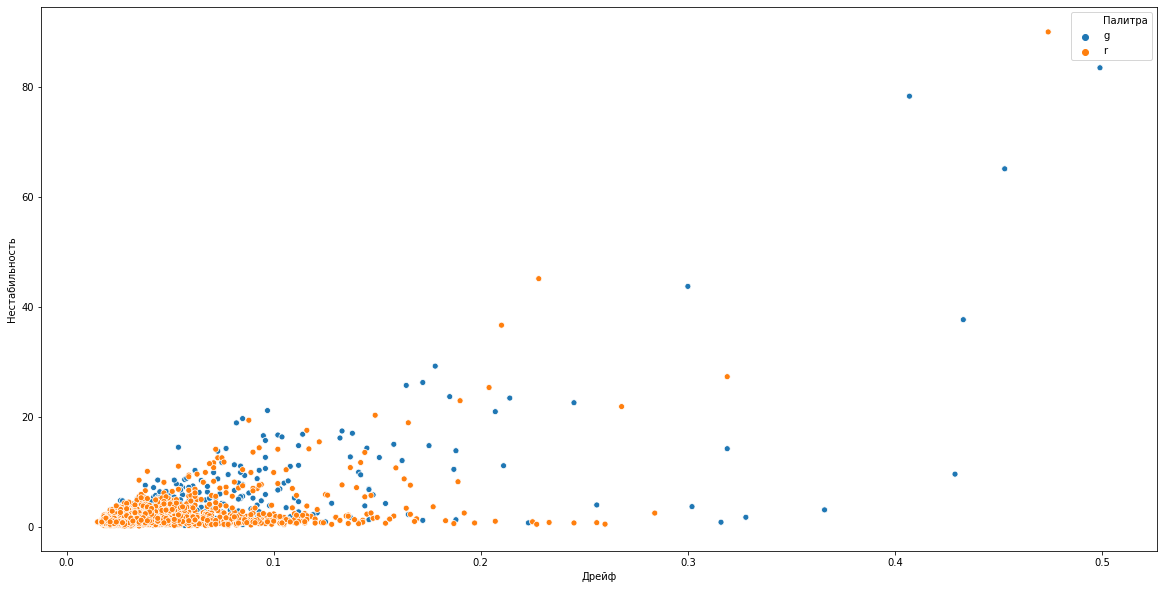

In [121]:
print("Критерий колмогорова-смирнова", "Returns statistic: float \nKS test statistic, either D, D+ or D-.\n pvalue: float\nOne-tailed or two-tailed p-value.")
print("Нестабильность", stats.kstest(df2.Нестабильность, 'norm'))
print("Не скомп дрейф", stats.kstest(df2.Дрейф, 'norm'), end='\n\n')

print('Критерий Шапиро-Уилко', "statistic: float \nThe test statistic. \np-value: float \nThe p-value for the hypothesis test.")
print("Нестабильность", stats.shapiro(df2.Нестабильность))
print("Не скомп дрейф", stats.shapiro(df2.Дрейф), end='\n\n')


fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data=df2, x='Дрейф', y='Нестабильность', hue='Палитра')
try:
    plt.savefig(r'C:\Course\ПНППК\6_1.png')
except FileNotFoundError:    
    plt.savefig(r'D:\Зубарев (D)\Git\Smartbase\6_1.png')
except:
    pass

In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 57374 to 62837
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   №ЭЧ             3812 non-null   object        
 1   Дата            3812 non-null   datetime64[ns]
 2   Нестабильность  3812 non-null   float64       
 3   Дрейф           3812 non-null   float64       
 4   Палитра         3812 non-null   object        
 5   bins            3802 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), object(2)
memory usage: 182.9+ KB


In [144]:
n_bins = 100
df2_r = df2.copy()
df2_r = df2_r[df2_r["Палитра"] == 'r']

#df2['bins'] = pd.cut(df2["Нестабильность"], n_bins)
df2_r['bins'] = pd.cut(df2_r["Нестабильность"], np.array([0, 0.5, 0.75, 1, 1.25, 1.5, 2, 3, 4, 5, 10, 20, 27]))
df2_bins = pd.DataFrame()
for i in df2_r.bins.sort_values().unique():
    std = df2_r[df2_r["bins"] == i]["Дрейф"].std()
    cnt = df2_r[df2_r["bins"] == i]["Дрейф"].size
    df2_bins = df2_bins.append({"bins":i, "std":std, "cnt":cnt}, ignore_index=True)
df2_bins.dropna() 

,bins,cnt,std
0,"(0.0, 0.5]",135.0,0.037585
1,"(0.5, 0.75]",313.0,0.031267
2,"(0.75, 1.0]",315.0,0.028455
3,"(1.0, 1.25]",374.0,0.021025
4,"(1.25, 1.5]",237.0,0.024238
5,"(1.5, 2.0]",384.0,0.023146
6,"(2.0, 3.0]",304.0,0.027446
7,"(3.0, 4.0]",95.0,0.027136
8,"(4.0, 5.0]",30.0,0.011978
9,"(5.0, 10.0]",56.0,0.036963


## Корреляция

In [69]:
print('За всё время')
a = df2["Нестабильность"]
b = df2["Дрейф"]

print("The Pearson correlation coefficient measures the linear relationship between two datasets")
print( stats.pearsonr(a, b) )

print("The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.")
print(stats.spearmanr(a,b))

print('\nЗа 2020')
a2 = df2[df2["Палитра"] == 'r']["Нестабильность"]
b2 = df2[df2["Палитра"] == 'r']["Дрейф"]

print("The Pearson correlation coefficient measures the linear relationship between two datasets")
print( stats.pearsonr(a2, b2) )

print("The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.")
print(stats.spearmanr(a2,b2))

За всё время
The Pearson correlation coefficient measures the linear relationship between two datasets
(0.6179558381137402, 0.0)
The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.
SpearmanrResult(correlation=0.329845763075742, pvalue=1.979562470972964e-97)

За 2020
The Pearson correlation coefficient measures the linear relationship between two datasets
(0.49632182230594646, 1.003956410257512e-141)
The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.
SpearmanrResult(correlation=0.27402364499843634, pvalue=1.8755906148357686e-40)


In [70]:
a = np.array(a)
b = np.array(b)
disctcorr_df2_1 = distcorr(a,b)
print(disctcorr_df2_1)


a2 = np.array(a2)
b2 = np.array(b2)
disctcorr_df2_2 = distcorr(a2,b2)
print(disctcorr_df2_2)

(0.47402106612506895, 0.0)
(0.3571231735407899, 0.0)
